In [1]:
import ast
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import seaborn as sns

#Loading dataset 
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_ind_da=df[(df['job_country']=="India")&(df['job_title_short']=='Data Analyst')].copy()
df_ind_da=df_ind_da.dropna(subset='salary_year_avg')
df_da_ind_explode=df_ind_da.explode('job_skills')
da_job_count=len(df_ind_da)

In [3]:
df_da_skills=df_da_ind_explode.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_da_skills['skill_perc']=df_da_skills['count']/da_job_count*100
df_da_skills=df_da_skills.rename(columns={'count':'skill_count','median':'salary_median'})
skill_percent=7
df_da_ind_high=df_da_skills[df_da_skills['skill_perc']>skill_percent]

In [4]:
df_da_ind_high

,skill_count,salary_median,skill_perc
job_skills,,,
sql,46,96050.00,48.936170
excel,39,98500.00,41.489362
python,36,96050.00,38.297872
tableau,20,108087.50,21.276596
r,18,79200.00,19.148936
power bi,17,111175.00,18.085106
azure,15,93600.00,15.957447
aws,12,79200.00,12.765957
oracle,11,79200.00,11.702128


In [10]:

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['qlik',
  'ssrs',
  'spreadsheet',
  'sheets',
  'powerpoint',
  'ms access',
  'ssis',
  'looker',
  'splunk',
  'sharepoint',
  'microstrategy',
  'spss',
  'dax',
  'outlook',
  'nuix',
  'alteryx',
  'word',
  'tableau',
  'sap',
  'datarobot',
  'msaccess',
  'sas',
  'powerbi',
  'power bi',
  'cognos',
  'esquisse',
  'excel',
  'visio'],
 'programming': ['solidity',
  'elixir',
  'c#',
  'mongodb',
  'c',
  'css',
  'rust',
  'go',
  'ruby',
  'dart',
  'f#',
  'ocaml',
  'delphi',
  'c++',
  'visual basic',
  'assembly',
  'cobol',
  'fortran',
  'bash',
  'lua',
  'matlab',
  'crystal',
  'kotlin',
  'no-sql',
  'python',
  'html',
  'erlang',
  't-sql',
  'powershell',
  'scala',
  'shell',
  'typescript',
  'perl',
  'groovy',
  'javascript',
  'apl',
  'golang',
  'vb.net',
  'haskell',
  'sass',
  'sas',
  'php',
  'clojure',
  'java',
  'objective-c',
  'lisp',
  'sql',
  'mongo',
  'julia',
  'nosql',
  'vba',
  'pascal',
  'visualbasic',
  'swift',
 

In [11]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,qlik
0,analyst_tools,ssrs
0,analyst_tools,spreadsheet
0,analyst_tools,sheets
0,analyst_tools,powerpoint
...,...,...
9,sync,twilio
9,sync,ringcentral
9,sync,wire
9,sync,microsoft teams


In [12]:
df_DA_skills_tech = df_da_ind_high.merge(df_technology, left_on='job_skills', right_on='skills')

df_DA_skills_tech

,skill_count,salary_median,skill_perc,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


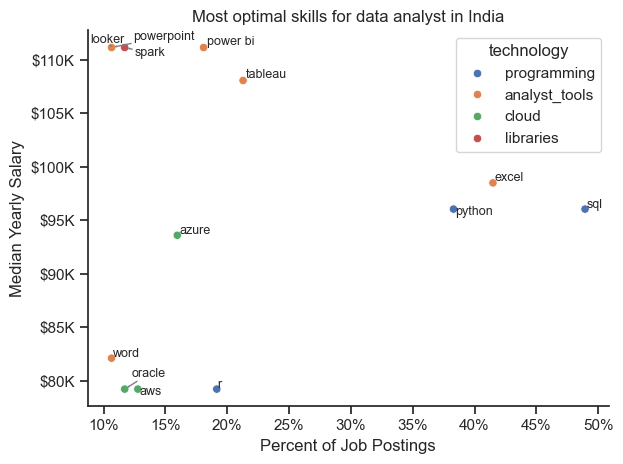

In [15]:
sns.scatterplot(
    data=df_DA_skills_tech,
    x='skill_perc',
    y='salary_median',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

from adjustText import adjust_text
#Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_da_ind_high.index):
    texts.append(plt.text(df_da_ind_high ['skill_perc'].iloc[i], df_da_ind_high['salary_median'].iloc[i], txt,fontsize=9))

#Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

#Set axis labels, title, and legend

from matplotlib.ticker import PercentFormatter
ax=plt.gca()
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.xlabel('Percent of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title("Most optimal skills for data analyst in India")
#Adjust layout and display plot
plt.tight_layout()
plt.show()